In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
sns.set()

In [ ]:
fp = pd.read_excel('/content/Data_Train.xlsx')

In [ ]:
fp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
fp["Duration"].value_counts()

,count
Duration,
2h 50m,550
1h 30m,386
2h 55m,337
2h 45m,337
2h 35m,329
...,...
30h 10m,1
31h 30m,1
42h 5m,1


In [ ]:
fp.dropna(inplace = True)

In [ ]:
fp.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,0
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,0
Additional_Info,0


In [ ]:
fp["Journey_day"] = pd.to_datetime(fp.Date_of_Journey, format="%d/%m/%Y").dt.day

In [ ]:
fp["Journey_month"] = pd.to_datetime(fp["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [ ]:
fp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [ ]:
fp["Dep_hour"] = pd.to_datetime(fp["Dep_Time"]).dt.hour

/tmp/ipython-input-11-417866809.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fp["Dep_hour"] = pd.to_datetime(fp["Dep_Time"]).dt.hour


In [ ]:
fp["Dep_min"] = pd.to_datetime(fp["Dep_Time"]).dt.minute

/tmp/ipython-input-12-1569221666.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fp["Dep_min"] = pd.to_datetime(fp["Dep_Time"]).dt.minute


In [ ]:
fp.drop(["Dep_Time"], axis = 1, inplace = True)

In [ ]:
fp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [ ]:
fp["Arrival_hour"] = pd.to_datetime(fp.Arrival_Time).dt.hour

/tmp/ipython-input-15-2618765892.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fp["Arrival_hour"] = pd.to_datetime(fp.Arrival_Time).dt.hour


In [ ]:
fp["Arrival_min"] = pd.to_datetime(fp.Arrival_Time).dt.minute

/tmp/ipython-input-16-2506391278.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fp["Arrival_min"] = pd.to_datetime(fp.Arrival_Time).dt.minute


In [ ]:
fp.drop(["Arrival_Time"], axis = 1, inplace = True)

In [ ]:
fp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [ ]:
duration = list(fp["Duration"])

standardized_duration = []
for d in duration:
    if 'h' in d and 'm' not in d:
        standardized_duration.append(d.strip() + " 0m")
    elif 'm' in d and 'h' not in d:
        standardized_duration.append("0h " + d)
    else:
        standardized_duration.append(d)

duration_hours = [int(d.split()[0][:-1]) for d in standardized_duration]
duration_mins = [int(d.split()[1][:-1]) for d in standardized_duration]

fp['Duration_Hours'] = duration_hours
fp['Duration_Mins'] = duration_mins


In [ ]:
fp.drop(["Duration"], axis = 1, inplace = True)

In [ ]:
fp.head()

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Mins
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [ ]:
fp["Airline"].value_counts()

,count
Airline,
Jet Airways,3849
IndiGo,2053
Air India,1751
Multiple carriers,1196
SpiceJet,818
Vistara,479
Air Asia,319
GoAir,194
Multiple carriers Premium economy,13


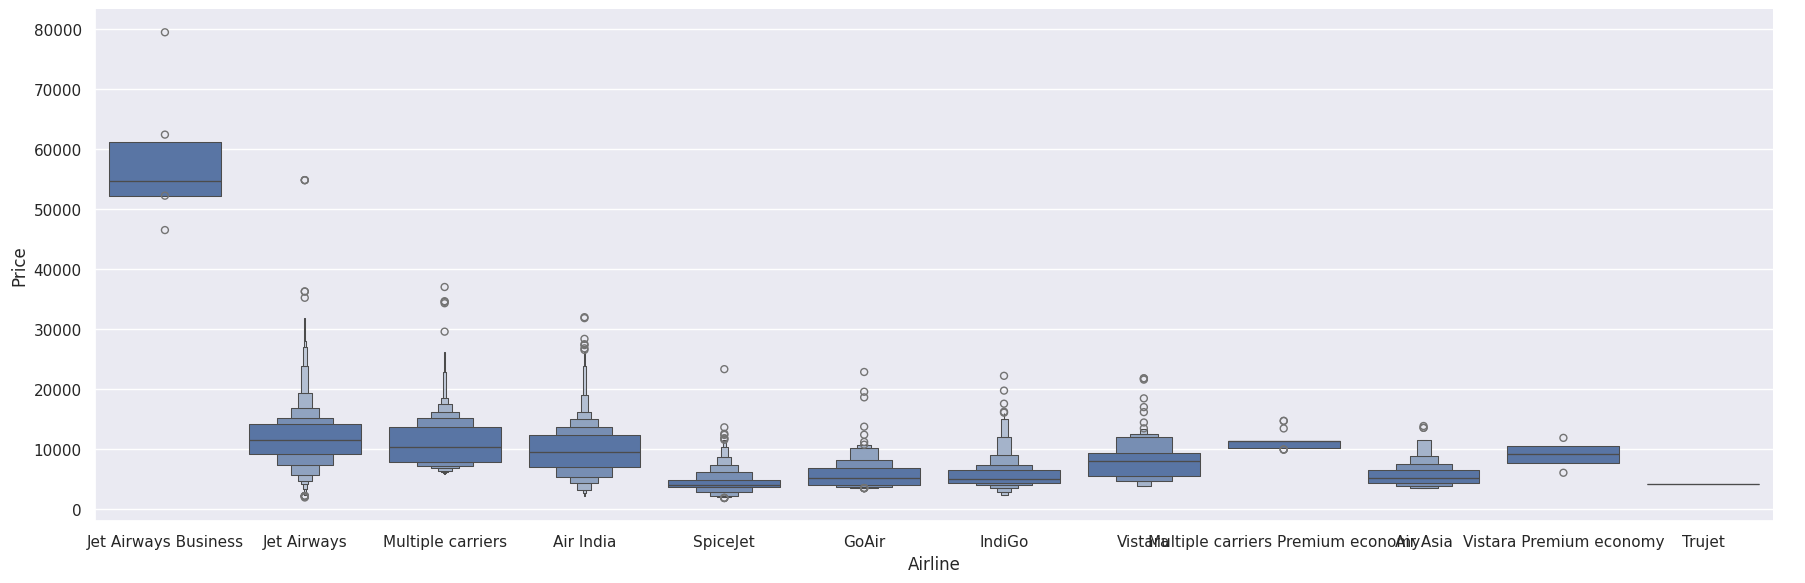

In [ ]:
sns.catplot(y = "Price", x = "Airline", data = fp.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [ ]:
Airline = pd.get_dummies(fp["Airline"], drop_first=True).astype(int)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
fp["Source"].value_counts()

,count
Source,
Delhi,4536
Kolkata,2871
Banglore,2197
Mumbai,697
Chennai,381


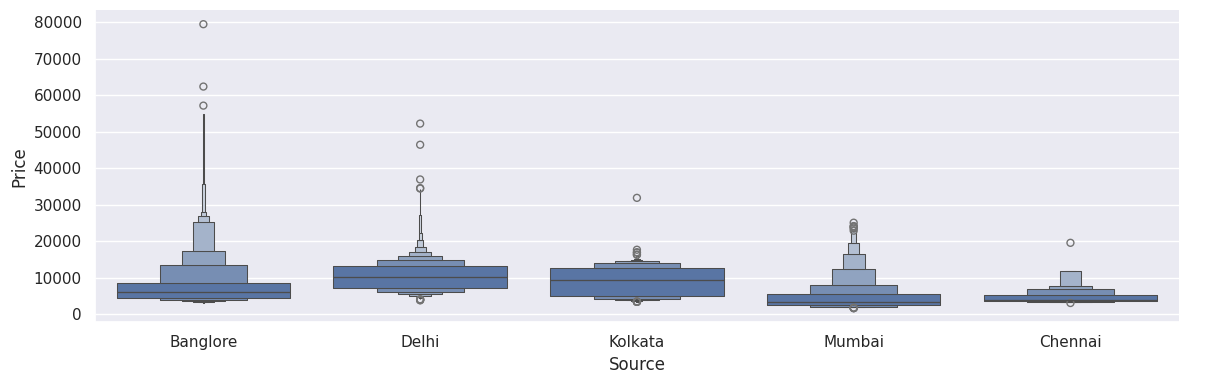

In [ ]:
sns.catplot(y = "Price", x = "Source", data = fp.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [ ]:
Source = pd.get_dummies(fp["Source"], drop_first=True).astype(int)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [ ]:
fp["Destination"].value_counts()

,count
Destination,
Cochin,4536
Banglore,2871
Delhi,1265
New Delhi,932
Hyderabad,697
Kolkata,381


In [ ]:
Destination = pd.get_dummies(fp["Destination"], drop_first=True).astype(int)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
fp["Route"]

,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL
...,...
10678,CCU → BLR
10679,CCU → BLR
10680,BLR → DEL
10681,BLR → DEL


In [ ]:
fp.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [ ]:
fp["Total_Stops"].value_counts()

,count
Total_Stops,
1 stop,5625
non-stop,3491
2 stops,1520
3 stops,45
4 stops,1


In [ ]:
fp.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

/tmp/ipython-input-33-375983423.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fp.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [ ]:
fp.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Mins
0,IndiGo,24/03/2019,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,1/05/2019,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,9/06/2019,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,12/05/2019,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,01/03/2019,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [ ]:
flight_data = pd.concat([fp, Airline, Source, Destination], axis = 1)

In [ ]:
flight_data.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,24/03/2019,Banglore,New Delhi,0,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,1/05/2019,Kolkata,Banglore,2,7662,1,5,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,9/06/2019,Delhi,Cochin,2,13882,9,6,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,12/05/2019,Kolkata,Banglore,1,6218,12,5,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,01/03/2019,Banglore,New Delhi,1,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
flight_data.shape

(10682, 34)

In [ ]:
fp_test = pd.read_excel('/content/Test_set.xlsx')

In [ ]:
fp_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
print("Test data Info")
print("-"*75)
print(fp_test.info())
print()
print()
print("Null values :")
print("-"*75)
fp_test.dropna(inplace=True)
print(fp_test.isnull().sum())

# Categorical data
print("Airline")
print("-"*75)
print(fp_test["Airline"].value_counts())
Airline = pd.get_dummies(fp_test["Airline"], drop_first=True).astype(int)

print()
print("Source")
print("-"*75)
print(fp_test["Source"].value_counts())
Source = pd.get_dummies(fp_test["Source"], drop_first=True).astype(int)

print()
print("Destination")
print("-"*75)
print(fp_test["Destination"].value_counts())
Destination = pd.get_dummies(fp_test["Destination"], drop_first=True).astype(int)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
fp_test.drop(["Route", "Additional_Info"], axis=1, inplace=True)

# Replacing Total_Stops
fp_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
fp_test = pd.concat([fp_test, Airline, Source, Destination], axis=1)
fp_test.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

print()
print()
print("Shape of test data : ", fp_test.shape)


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

/tmp/ipython-input-40-2293962236.py:34: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fp_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)


In [ ]:
fp_test.head()

,Date_of_Journey,Dep_Time,Arrival_Time,Duration,Total_Stops,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,6/06/2019,17:30,04:25 07 Jun,10h 55m,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
1,12/05/2019,06:20,10:20,4h,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,21/05/2019,19:15,19:00 22 May,23h 45m,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
3,21/05/2019,08:00,21:00,13h,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24/06/2019,23:55,02:45 25 Jun,2h 50m,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
fp_test.shape

(2671, 24)

In [ ]:
fp_test.columns

Index(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [ ]:
X = fp[['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_Hours', 'Duration_Mins']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_Hours,Duration_Mins
0,0,24,3,22,20,1,10,2,50
1,2,1,5,5,50,13,15,7,25
2,2,9,6,9,25,4,25,19,0
3,1,12,5,18,5,23,30,5,25
4,1,1,3,16,50,21,35,4,45


In [ ]:
y = fp['Price']
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [ ]:
print(selection.feature_importances_)

[0.26772376 0.14298082 0.09278786 0.05405792 0.05212573 0.06735171
 0.05126202 0.22934032 0.04236985]


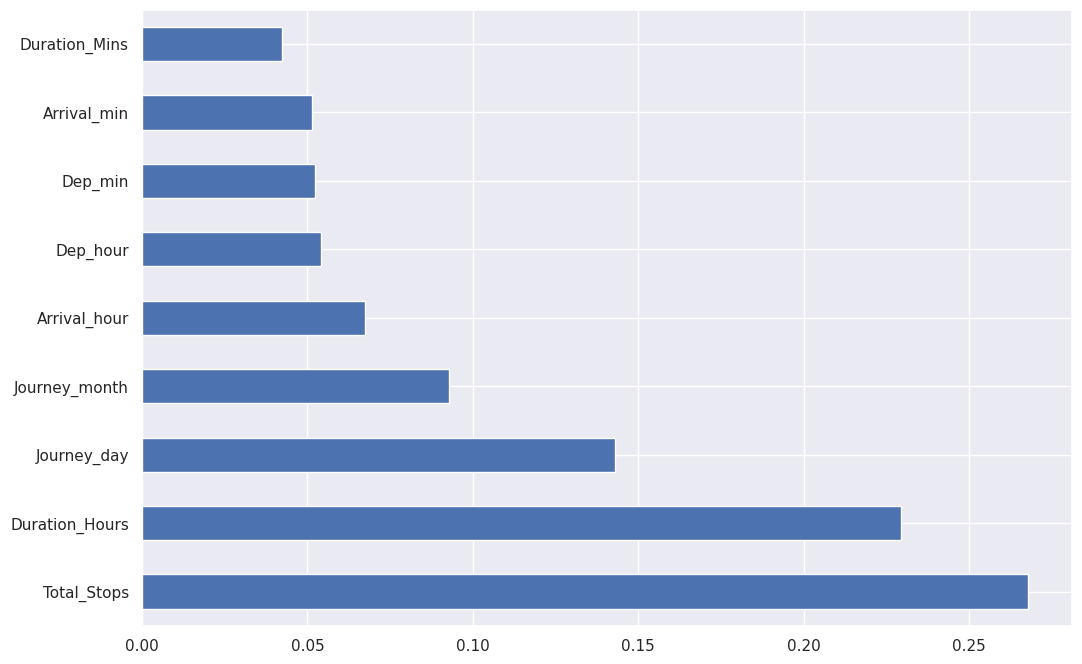

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target DataFrames
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_rf = RandomForestRegressor(n_estimators=100, random_state=42)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = reg_rf.predict(X_test)

In [ ]:
reg_rf.score(X_train, y_train)

0.9412396977257819

In [ ]:
reg_rf.score(X_test, y_test)

0.7222835140665055

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1407.8404342880772
MSE: 5988138.511846294
RMSE: 2447.067328833903


In [ ]:
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y), '\nMin Value: ', min(y))

Normalized RMSE  0.04
Max Value:  79512 
Min Value:  1759


In [ ]:
metrics.r2_score(y_test, y_pred)

0.7222835140665055

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [ ]:
prediction = rf_random.predict(X_test)

/tmp/ipython-input-64-375150797.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


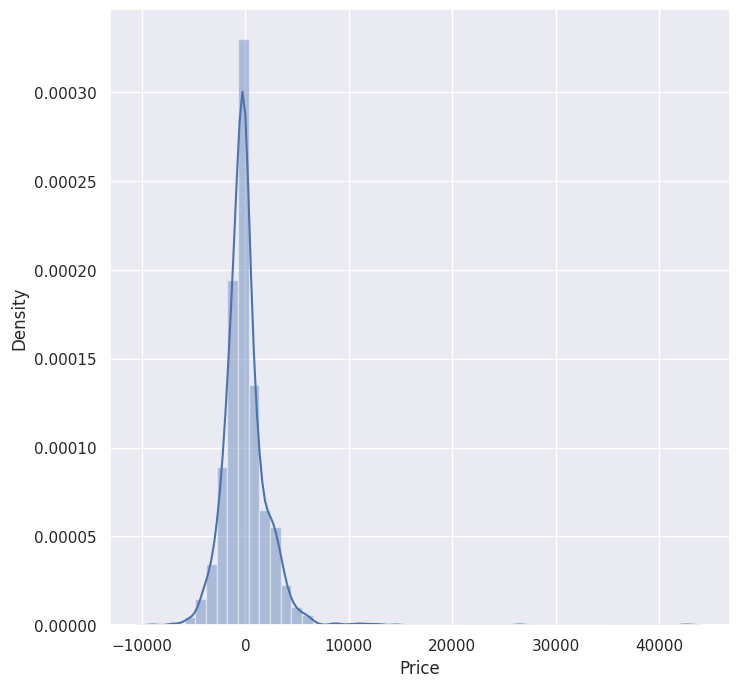

In [ ]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1400.1941131763465
MSE: 5036685.8552113185
RMSE: 2244.256191973483


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import pickle

# Load the training data
train_df = pd.read_excel('/content/Data_Train.xlsx')

# Load the test data
test_df = pd.read_excel('/content/Test_set.xlsx')

# Combine the data
combined_df = pd.concat([train_df, test_df])

# One-hot encode categorical features
categorical_cols = combined_df.select_dtypes(include=['object']).columns
combined_df = pd.get_dummies(combined_df, columns=categorical_cols)

# Split the combined data back into train and test
train_df = combined_df[:len(train_df)]
test_df = combined_df[len(train_df):]

# Split the training data into X and y
X = train_df.drop(['Price'], axis=1)
y = train_df['Price']

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Save the model to a pkl file
with open('flight_rf_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Make predictions on the test data
X_test = test_df.drop(['Price'], axis=1)
y_pred = model.predict(X_test)

# Split the combined data back into train and test
train_df = combined_df[:len(train_df)]
test_df = combined_df[len(train_df):].drop(['Price'], axis=1)


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
import pickle
from datetime import datetime

model = pickle.load(open('flight_rf_model.pkl', 'rb'))

def predict_price(journey_date, dep_time, arrival_time, duration_hour, duration_min, stops, airline, source, destination):
    try:
        # Feature extraction
        journey_date = datetime.strptime(journey_date, "%Y-%m-%d")
        dep_time = datetime.strptime(dep_time, "%H:%M")
        arrival_time = datetime.strptime(arrival_time, "%H:%M")

        Journey_day = journey_date.day
        Journey_month = journey_date.month
        Dep_hour = dep_time.hour
        Dep_min = dep_time.minute
        Arrival_hour = arrival_time.hour
        Arrival_min = arrival_time.minute
        Duration = int(duration_hour) * 60 + int(duration_min)

        stops_map = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
        Total_Stops = stops_map[stops]

        airline_list = ['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy']
        source_list = ['Bangalore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai']
        dest_list = ['Bangalore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi']
        additional_features = [0] * 2232  # Adjusted to match the expected number of features

        airline_encoded = [1 if airline == i else 0 for i in airline_list]
        source_encoded = [1 if source == i else 0 for i in source_list]
        dest_encoded = [1 if destination == i else 0 for i in dest_list]

        features = [
            Total_Stops,
            Journey_day,
            Journey_month,
            Dep_hour,
            Dep_min,
            Arrival_hour,
            Arrival_min,
            Duration
        ] + airline_encoded + source_encoded + dest_encoded + additional_features

        prediction = model.predict([features])[0]
        return f"Estimated Flight Price: ₹ {int(prediction):,}"
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Gradio interface
demo = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Textbox(label="Date of Journey (YYYY-MM-DD)", value="2024-07-01"),
        gr.Textbox(label="Departure Time (HH:MM)", value="09:00"),
        gr.Textbox(label="Arrival Time (HH:MM)", value="11:45"),
        gr.Number(label="Duration Hours", value=2),
        gr.Number(label="Duration Minutes", value=45),
        gr.Radio(['non-stop', '1 stop', '2 stops', '3 stops', '4 stops'], label="Stops"),
        gr.Dropdown(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy'], label="Airline"),
        gr.Dropdown(['Bangalore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], label="Source"),
        gr.Dropdown(['Bangalore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'], label="Destination")
    ],
    outputs="text",
    title="✈ Flight Price Predictor",
    description="Enter your flight details to predict the ticket price."
)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://de876443de8efe4caf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
